# Setup

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fxvol.data_utils import load_csv

In [2]:
# Pictures size

plt.rcParams['figure.figsize'] = [15, 8]

# Check raw data

In [3]:
fx_spots = load_csv('raw', 'fx_spots')
fx_spots.isna().sum()

AUD    2
CHF    4
EUR    1
GBP    1
JPY    1
dtype: int64

Few values missing -> just interpolate.
data_comps.py script -> interpolate, compute and save log returns

# Check processed data

In [4]:
fx_spots = load_csv('processed', 'fx_spots')
fx_spots.isna().sum()

AUD    0
CHF    0
EUR    0
GBP    0
JPY    0
dtype: int64

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

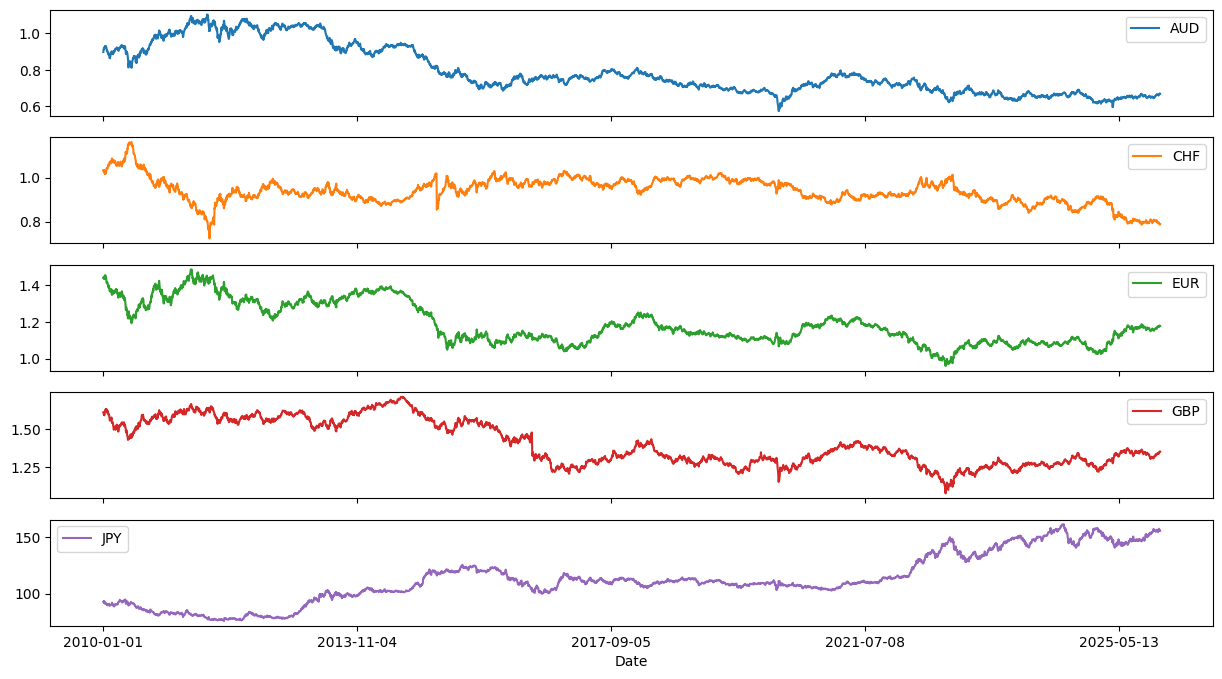

In [5]:
fx_spots.plot(subplots=True)

In [6]:
log_returns = load_csv('processed', 'log_returns')
log_returns.isna().sum()

AUD    0
CHF    0
EUR    0
GBP    0
JPY    0
dtype: int64

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

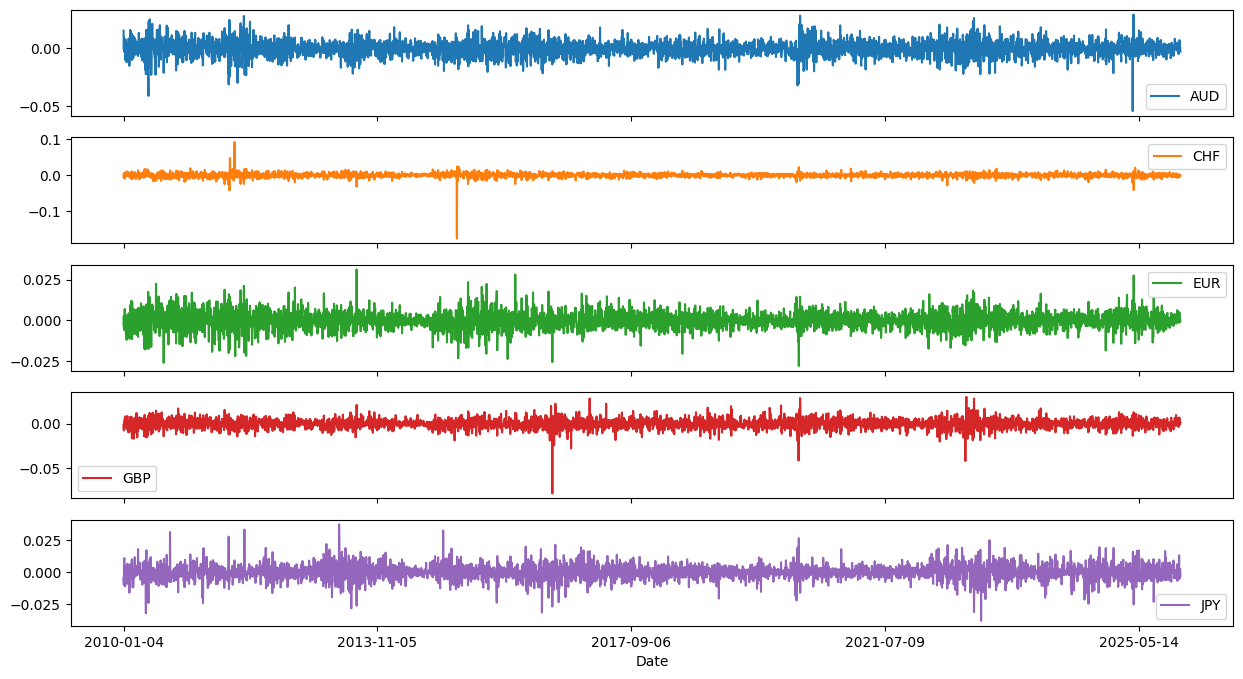

In [7]:
log_returns.plot(subplots=True)

# Sanity checks for returns

Limit to Eur for now.

## Autocorrelations

In [8]:
eur = log_returns['EUR']

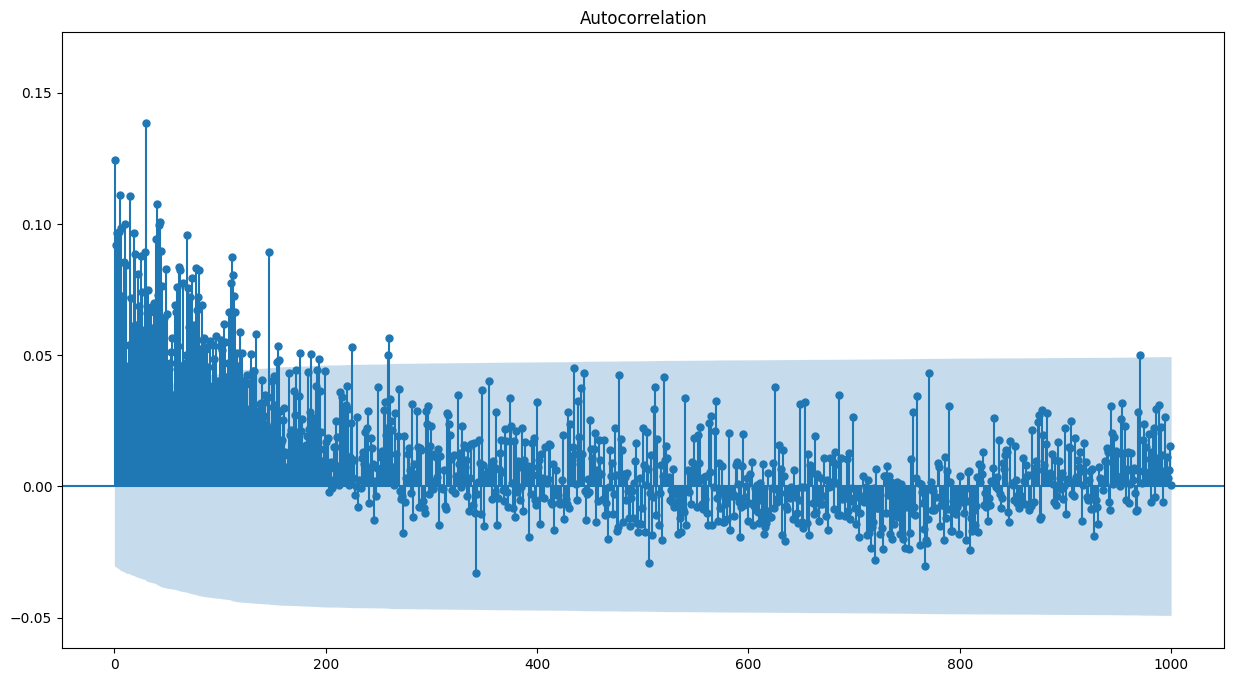

In [ ]:
# Plot acf graph fpr returns squared.

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(eur**2, lags = 1000, zero = False, auto_ylims=True);

As expected, strong autocorrelations at the beginning, then decreasing.

## Rolling vol

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

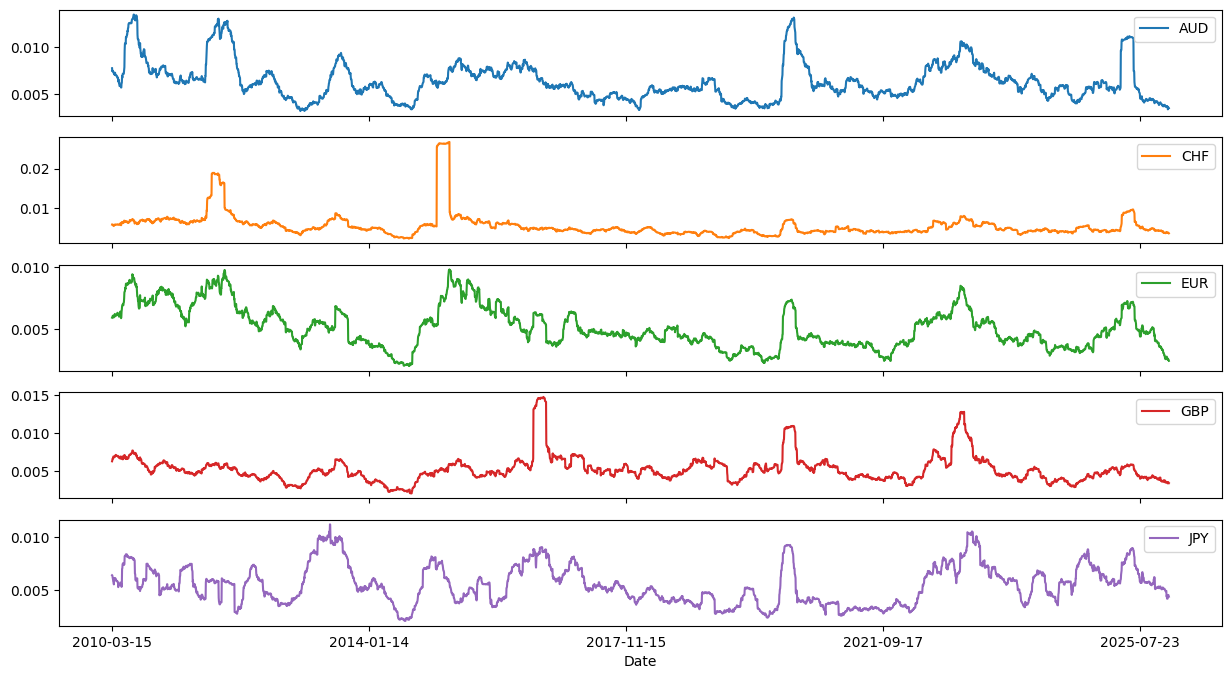

In [ ]:
# Plot historical vol over a 50-day rolling window

from fxvol.fin_comp import comp_hist_vol

hist_vol = comp_hist_vol(fx_spots, period=50).dropna()
hist_vol.plot(subplots=True)

As expected, we see clustering, with different periods of low and high volatility.